In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pylab as plt

In [2]:
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_json("results/data-2019-08-30.json").rename({'name': 'action'}, axis=1)

In [4]:
df.sample(n=10, random_state=42)

,action,db,duration,env,i,ms,qps
161001,delete,postgres,9301112385,docker,7613.0,2284.128413,3333
190523,read2a,postgres,9423318988,docker,3803.0,1141.014101,3333
154080,delete,postgres,5879900511,docker,692.0,207.620762,3333
215100,read2b,postgres,18986587707,docker,11714.0,3514.551455,3333
29042,create2,postgres,115720714,docker,664.0,1993.993994,333
86626,delete,postgres,1397414,docker,3240.0,3240.000000,1000
68307,read2b,mysql,1937573494,docker,4925.0,4925.000000,1000
199162,read2a,postgres,10993953684,docker,12442.0,3732.973297,3333
84603,delete,postgres,2884898,docker,1217.0,1217.000000,1000
53767,create2,mysql,5243224186,docker,387.0,387.000000,1000


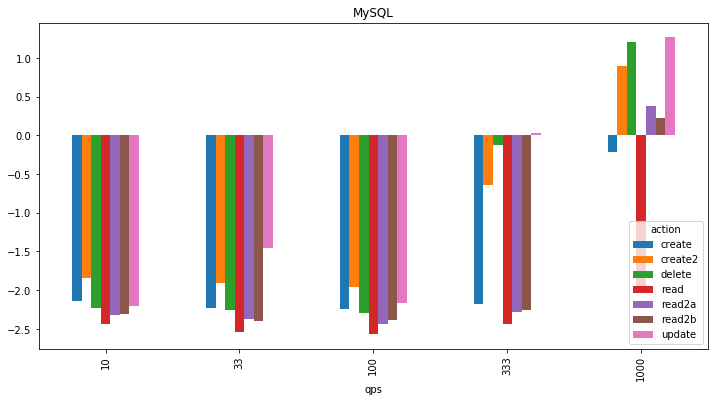

In [5]:
conditions = (
    ~df['action'].str.contains('Map') \
        & (df['ms'] >= 1000) \
        & (df['ms'] <= 4000)
        & (df['db'] == 'mysql')
)

data = df[conditions].groupby(['action', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title='MySQL')

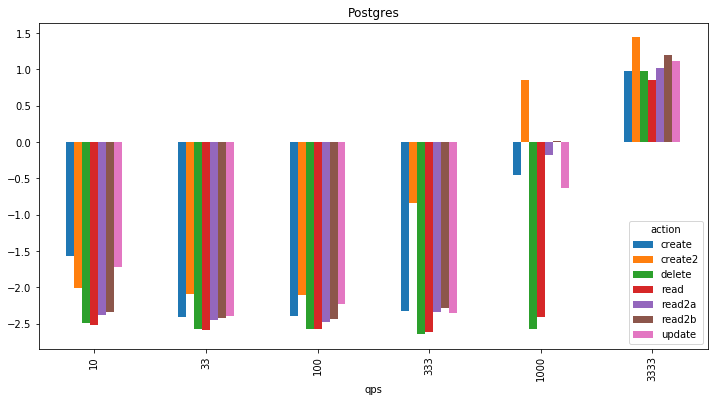

In [6]:
conditions = (
    ~df['action'].str.contains('Map') \
        & (df['ms'] >= 1000) \
        & (df['ms'] <= 4000)
        & (df['db'] == 'postgres')
)

data = df[conditions].groupby(['action', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title='Postgres')

# Postgres still faster than MySQL

create takes 25.97% longer on MySQL
read takes 20.95% longer on MySQL
update takes -25.42% longer on MySQL
delete takes 86.87% longer on MySQL
read2a takes 14.23% longer on MySQL
read2b takes 19.55% longer on MySQL


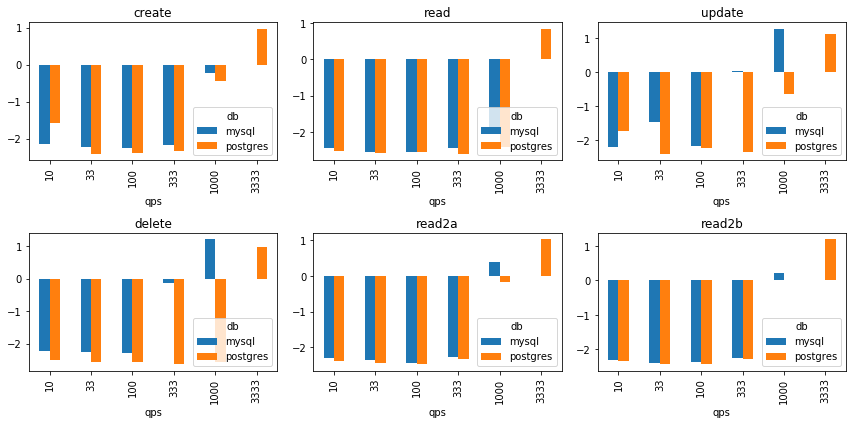

In [7]:
_, _axes = plt.subplots(2, 3)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['create', 'read', 'update', 'delete', 'read2a', 'read2b'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    
    data = data
    ratio = (data['mysql'] / data['postgres'])
    ratio[ratio > 2.0] = np.nan
    print "{} takes {:.2%} longer on MySQL".format(action, ratio.mean() - 1)
    
plt.tight_layout()

# Complex queries and creates are significantly slower

read takes 20.95% longer on MySQL
read2a takes 14.23% longer on MySQL
read takes 20.95% longer on MySQL
read2b takes 19.55% longer on MySQL


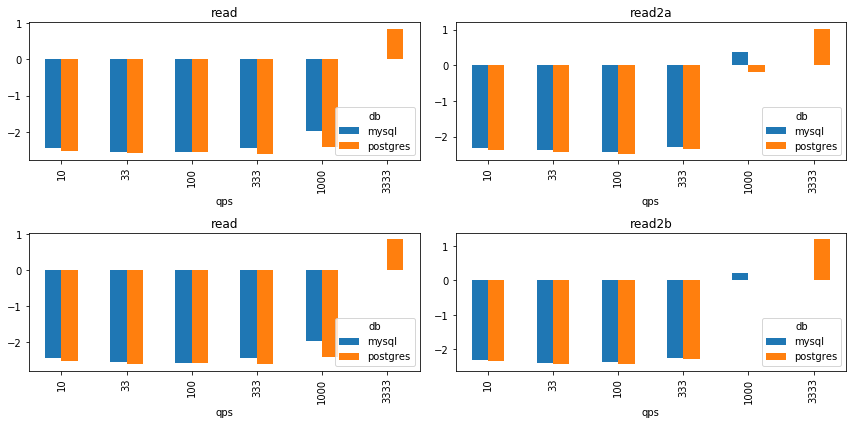

In [16]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['read', 'read2a', 'read', 'read2b'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    
    data = data
    ratio = (data['mysql'] / data['postgres'])
    ratio[ratio > 2.0] = np.nan
    print "{} takes {:.2%} longer on MySQL".format(action, ratio.mean() - 1)
    
plt.tight_layout()

create takes 25.97% longer on MySQL
create2 takes 41.93% longer on MySQL


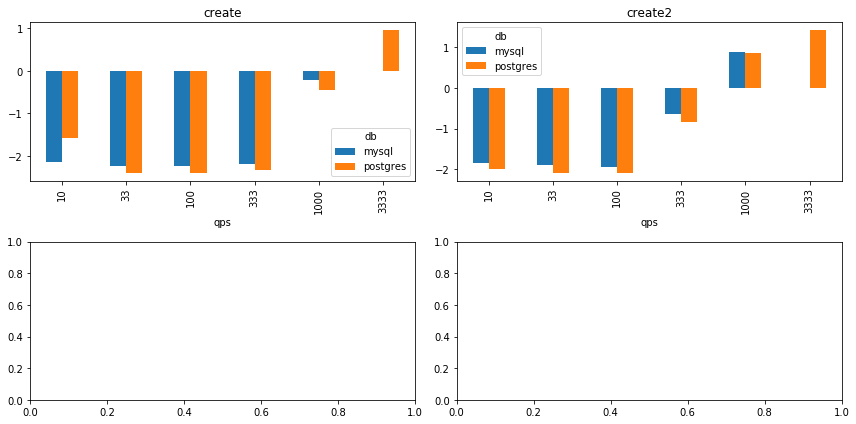

In [14]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['create', 'create2'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    
    data = data
    ratio = (data['mysql'] / data['postgres'])
    ratio[ratio > 2.0] = np.nan
    print "{} takes {:.2%} longer on MySQL".format(action, ratio.mean() - 1)
    
plt.tight_layout()